Optimal Threshold (F1): 0.37373737373737376


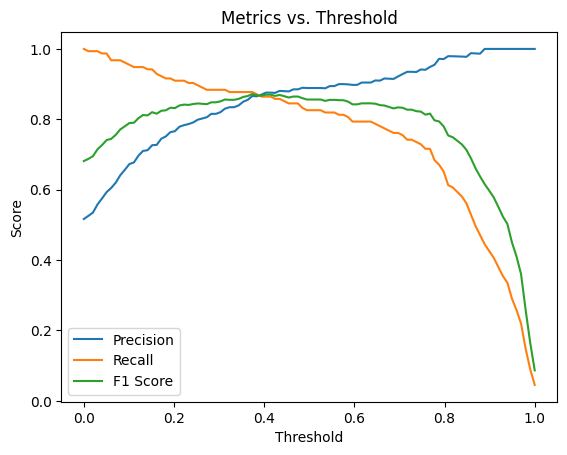

In [1]:
from exo_toolkit import *
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Evaluate thresholds
metrics = evaluate_thresholds(y_test, y_probs)

# Find optimal threshold
optimal_threshold = find_optimal_threshold(metrics, metric="f1")
print(f"Optimal Threshold (F1): {optimal_threshold}")

# Plot metrics
plot_metrics(metrics)

# Final predictions using optimal threshold
y_final_pred = (y_probs >= optimal_threshold).astype(int)


Optimal Threshold (F1): 0.14141414141414144


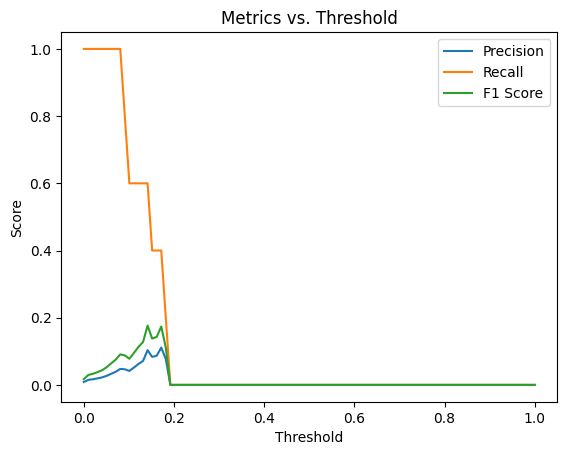

Accuracy: 0.9508771929824561
Confusion Matrix:
 [[539  26]
 [  2   3]]


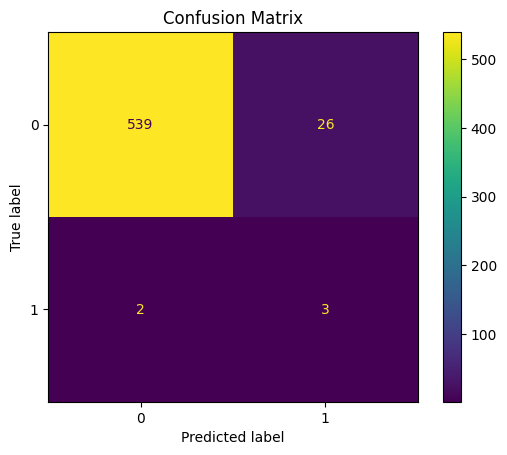

In [1]:
from exo_toolkit import *
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# Load data
train_data = pd.read_csv('data/exoTrain.csv')
test_data = pd.read_csv('data/exoTest.csv')

# Separate features & labels
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

# Map labels to binary: 1 → 0, 2 → 1
y_train = y_train.map({1: 0, 2: 1})
y_test = y_test.map({1: 0, 2: 1})

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate thresholds
metrics = evaluate_thresholds(y_test, y_probs)

# Find the optimal threshold (e.g., for F1 score)
optimal_threshold = find_optimal_threshold(metrics, metric="f1")
print(f"Optimal Threshold (F1): {optimal_threshold}")

# Plot metrics for better understanding
plot_metrics(metrics)

# Apply the optimal threshold
y_pred = (y_probs >= optimal_threshold).astype(int)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)